In [26]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings



##VAMOS A LEER EL CONJUNTO DE DATOS (DATA SET, DATAFRAME)
#** SE REALIZARA UNA REVISION GENERAL Y DESCRIPTIVA  DE LOS DATOS

In [27]:
#Asegurarnos de que lee adecuadamente el archivo y conocer de forma general los datos
df = pd.read_excel('/content/Data_clean para portafolio.xlsx')
print(df.head())

   OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            7       1710         548          856         2       2003   
1            6       1262         460         1262         2       1976   
2            7       1786         608          920         2       2001   
3            7       1717         642          756         1       1915   
4            8       2198         836         1145         2       2000   

   PoolArea  SalePrice  
0         0     208500  
1         0     181500  
2         0     223500  
3         0     140000  
4         0     250000  


In [35]:
df

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,PoolArea,SalePrice
0,7,1710,548,856,2,2003,0,208500
1,6,1262,460,1262,2,1976,0,181500
2,7,1786,608,920,2,2001,0,223500
3,7,1717,642,756,1,1915,0,140000
4,8,2198,836,1145,2,2000,0,250000
...,...,...,...,...,...,...,...,...
1455,6,1647,460,953,2,1999,0,175000
1456,6,2073,500,1542,2,1978,0,210000
1457,7,2340,252,1152,2,1941,0,266500
1458,5,1078,240,1078,1,1950,0,142125


# Análisis general de los datos

In [28]:
#forma de la matriz
df.shape



(1460, 8)

In [29]:
#Descripcion estad[istica general de los datos
df.describe()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,472.980137,1057.429452,1.565068,1971.267808,2.758904,180921.195890
std,1.382997,525.480383,213.804841,438.705324,0.550916,30.202904,40.177307,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,0.000000,34900.000000
25%,5.000000,1129.500000,334.500000,795.750000,1.000000,1954.000000,0.000000,129975.000000
50%,6.000000,1464.000000,480.000000,991.500000,2.000000,1973.000000,0.000000,163000.000000
75%,7.000000,1776.750000,576.000000,1298.250000,2.000000,2000.000000,0.000000,214000.000000
max,10.000000,5642.000000,1418.000000,6110.000000,3.000000,2010.000000,738.000000,755000.000000


In [30]:
# Total de registros por tipo de variable
df.dtypes.value_counts()

,count
int64,8


In [31]:
df.columns

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'PoolArea', 'SalePrice'],
      dtype='object')

In [32]:
# Descripción de variable objetivo
df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [33]:
correlaciones= df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(correlaciones)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
FullBath       0.560664
YearBuilt      0.522897
PoolArea       0.092404
Name: SalePrice, dtype: float64


Estas correlaciones nos ayudan a determinar , que variables usaremos para utilizar en el modelo. Las correlaciones m[as altas indican mayor incidencia o influencia en el precio de venta de una casa, por lo tanto seran las variables que usaremos.


# ESTADISTICA DESCRIPTIVA DE LOS DATOS

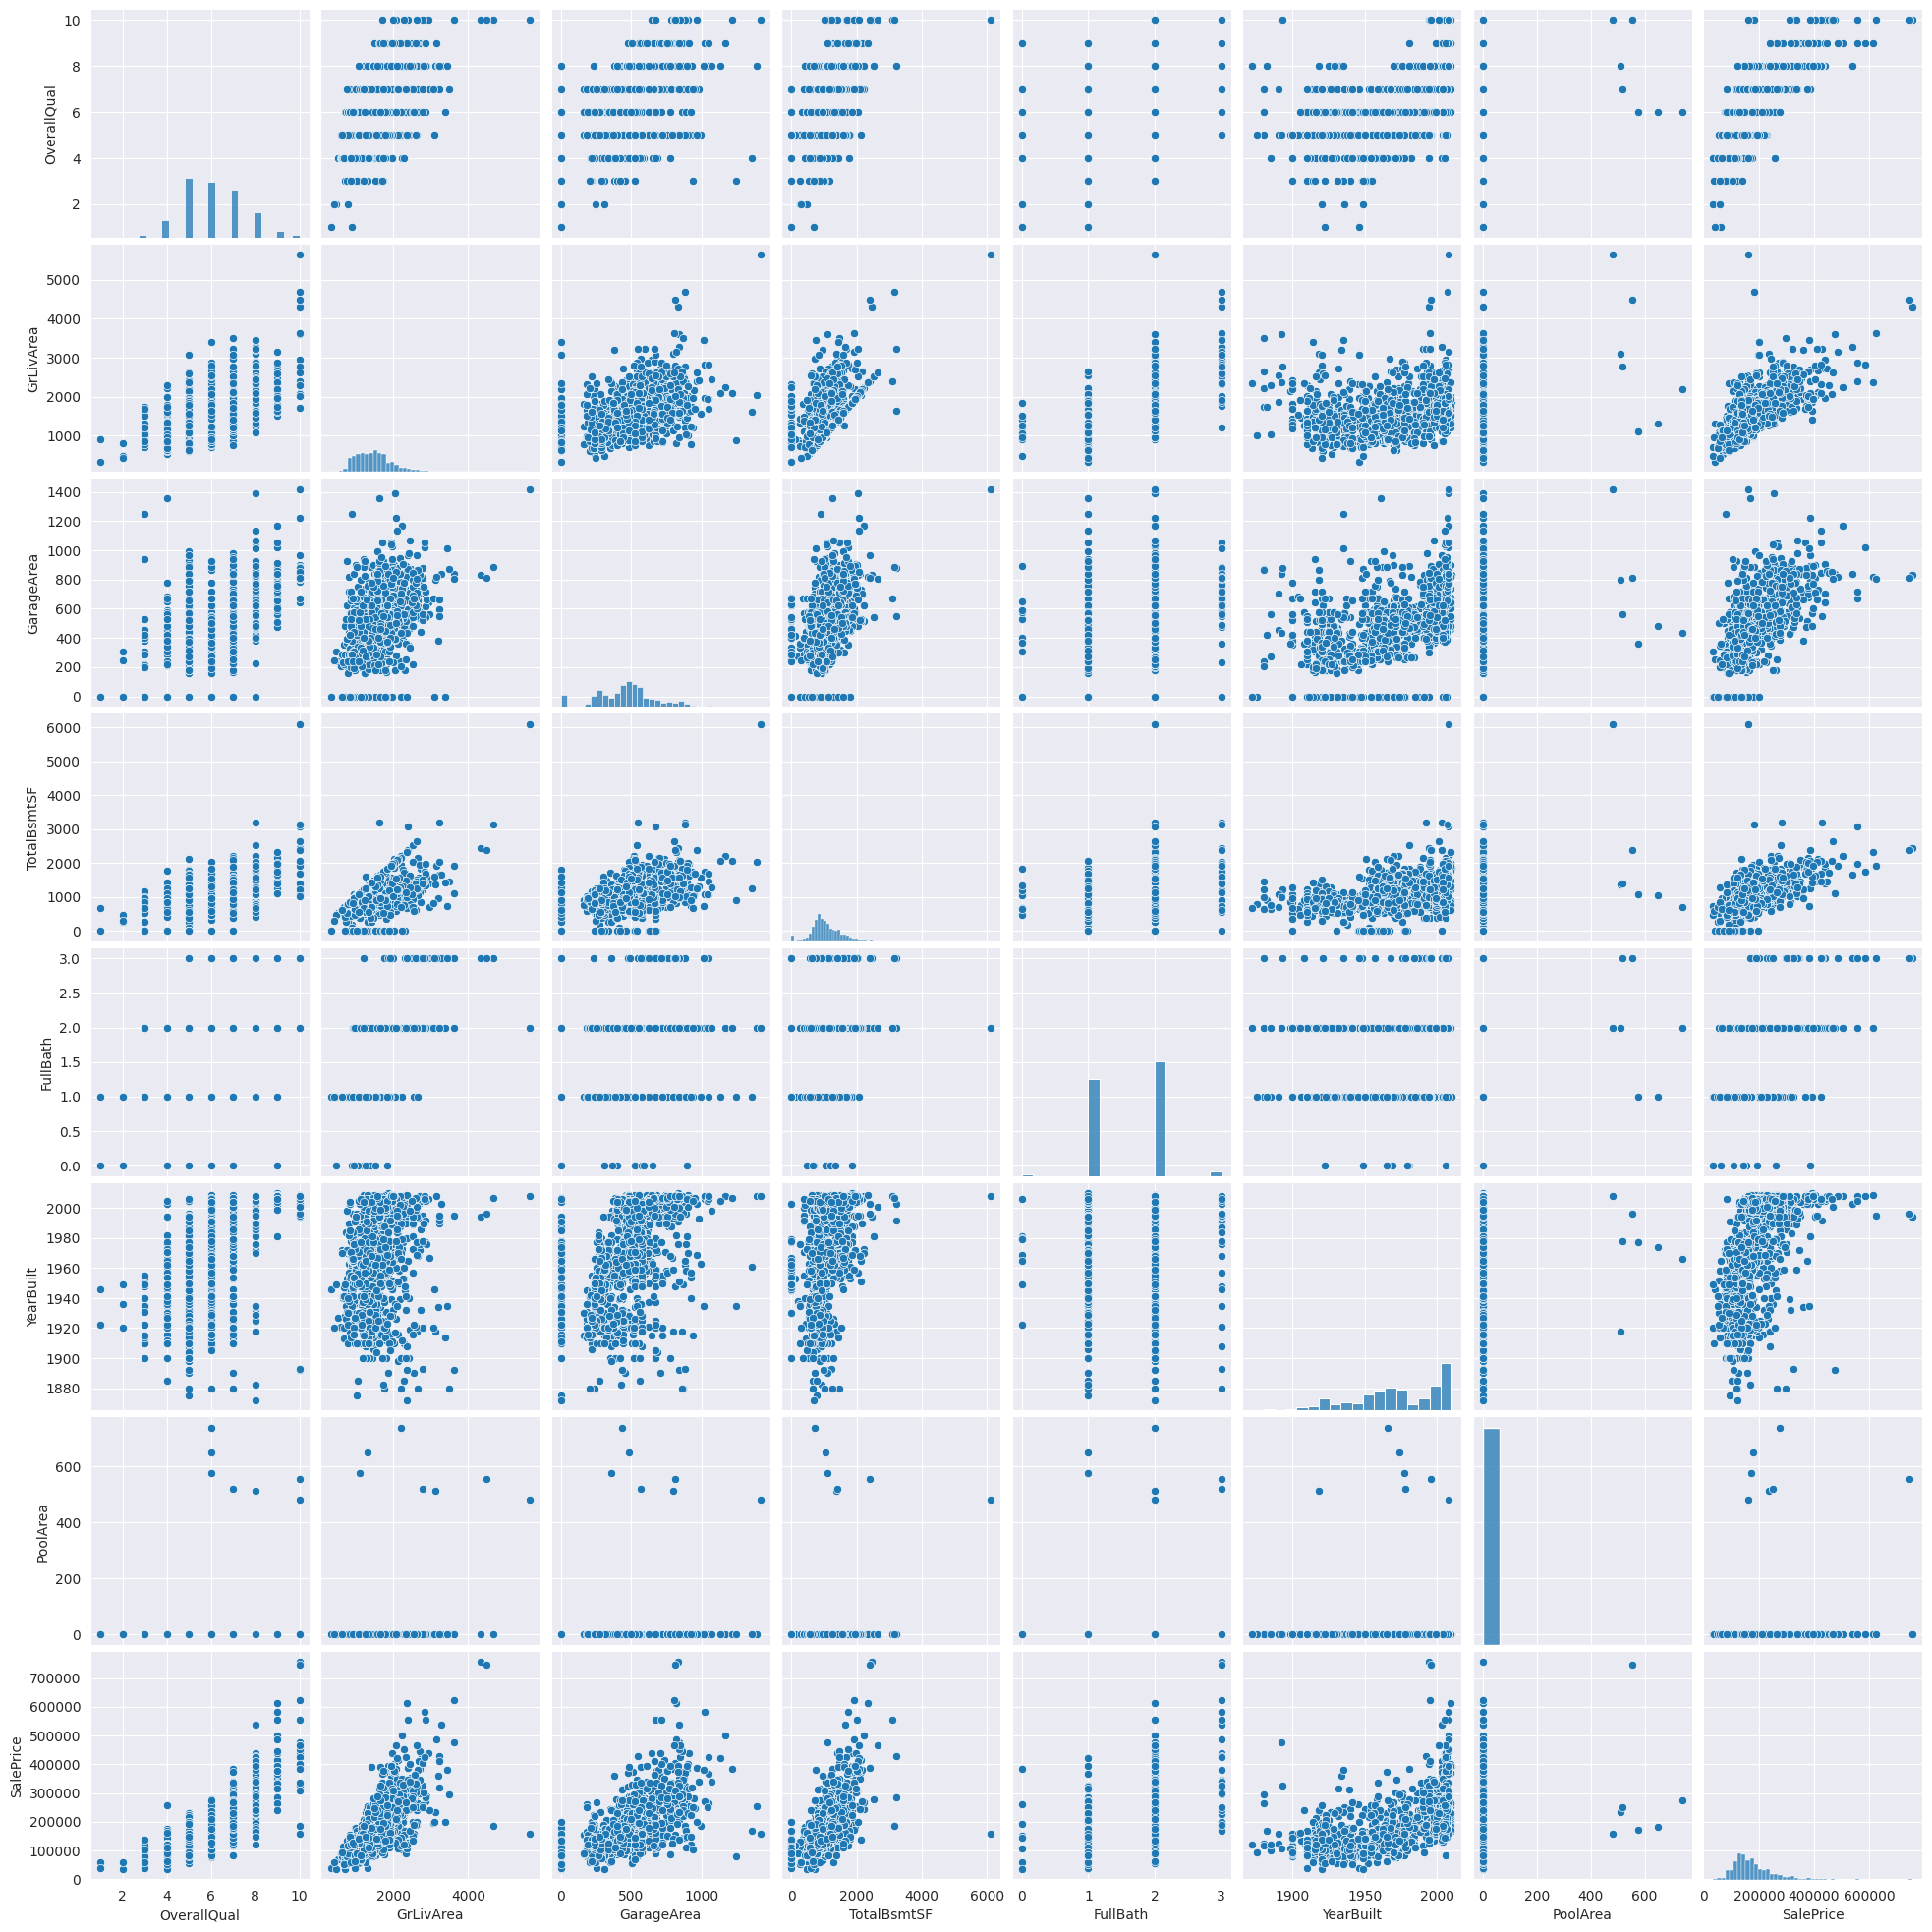

In [34]:
sns.set_style('darkgrid')
sns.pairplot(df)